<a href="https://colab.research.google.com/github/Surajk7725/OpenCV/blob/main/Video_Writing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read Video from Source**

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

In [10]:
source = '/content/race_car.mp4'  #source = 0 for webcam
cap = cv2.VideoCapture(source)

In [11]:
if(cap.isOpened() == False):
  print("Error opening video stream or file")

**Read and Display one frame**

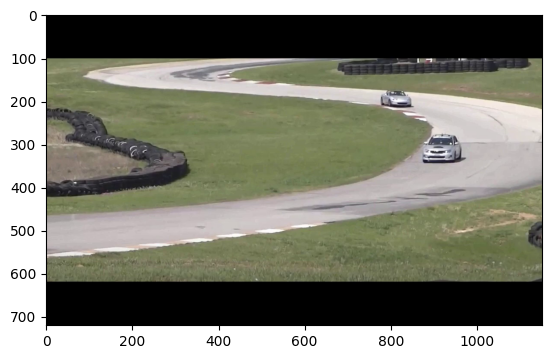

In [12]:
ret , frame = cap.read()
#plt.imshow(frame[:,:,::-1])
plt.imshow(frame[...,::-1])

**Display the video from file**

1. If your want to display your video in jupyter, pycharm or vscode. You can use this approach too.
```
from IPython.display import HTML
HTML("""
<video width=1024 controls>
<source src="your_filename.mp4" type="video/mp4">
</video>
""")
```

2. In Google Colab,

Youtube Url : https://www.youtube.com/watch?v=RwxVEjv78LQ

In this your video id will be "RwxVEjv78LQ".

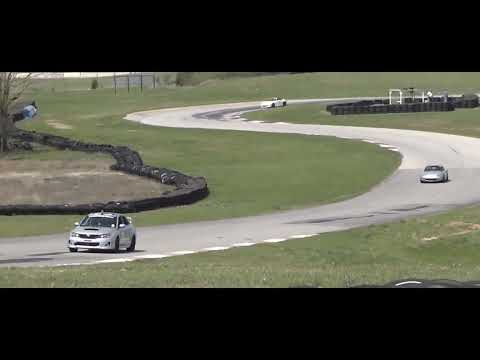

In [13]:
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

**Write Video using OpenCV**

***Function Syntax*** :

VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )

VideoWriter is used to write frames to a video file

where,
1.   *`filename`*: Name of the output video file.
1.   *`fps`*: Framerate of the created video stream.
2.   *`frameSize`*: Size of the video frames.
2.   *`fourcc`*: 4-character code of codec used to compress the frames.

For example, if you want to create a video file using the MPEG-1 codec, you would use the `fourcc('P','I','M','1')` function in OpenCV to specify this codec. Similarly, `fourcc('M','J','P','G')` would specify the motion-jpeg codec.



In [14]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
# Write for .avi video file.
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

# Write for .mp4 video file
out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

**Read frames and write to file**

We will read the frames from the race-car video and write the same to the two objects we created in the previous step. We should release the objects after the task is complete.

In [15]:
# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break

In [16]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

To display video on Google Colab, we will install and use the `ffmpeg` package. Using `ffmpeg` we will change the encoding of the `.mp4` file from XVID to H264.

HTML 5 can properly render videos with H264 encoding and OpenCV doesn't have that encoding yet. That's why we need to change their encodings such that they can be rendered.

In [17]:
!apt-get -qq install ffmpeg

Currently, HTML5 only suports renedering of MP4 files, so we'll only change the encoding of the race_car.mp4 file.

In [18]:
# Change video encoding of mp4 file from XVID to h264
!ffmpeg -y -i "/content/race_car.mp4" -c:v libx264 "race_car_x264.mp4"  -hide_banner -loglevel error

**Render MP4 Video**

In [19]:
mp4 = open("/content/race_car_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")